In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra

In [ ]:
df_train = pd.read_csv("/content/train_u6lujuX_CVtuZ9i.csv")
df_test = pd.read_csv("/content/test_Y3wMUE5_7gLdaTN.csv")

In [ ]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
nunique = df_train.nunique()
df = df_train[[col for col in df_train if nunique[col] > 1 and nunique[col] <5]]
df

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y
...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,1.0,Urban,Y


In [ ]:
df_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
for column in df.columns:
    df_train[column].fillna( method ='ffill', inplace = True)

In [ ]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df_train.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df_train['Loan_Amount_Term'].mean()

342.0

In [ ]:
df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].replace(np.nan,df_train['Loan_Amount_Term'].mean())

df_train['LoanAmount'] = df_train['LoanAmount'].replace(np.nan,df_train['LoanAmount'].mean())

In [ ]:
df_train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.835505
std,6109.041673,2926.248369,84.037468,64.372489,0.371027
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [ ]:
# Using map function
df_train['Loan_Status'] = df_train['Loan_Status'].map({'Y': 1, 'N': 0})

In [ ]:
df_train['Loan_Amount_Term'].unique()

array([360., 120., 240., 342., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [ ]:
bar = df_train.groupby(['Gender','Property_Area'])[['Loan_Status']].sum().reset_index()
bar

,Gender,Property_Area,Loan_Status
0,Female,Rural,15
1,Female,Semiurban,43
2,Female,Urban,19
3,Male,Rural,95
4,Male,Semiurban,136
5,Male,Urban,114


In [ ]:
df_train['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [ ]:
df_train['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [ ]:
df_train['Gender'] = df_train['Gender'].map({'Male': 1, 'Female': 0})
df_train['Married'] = df_train['Married'].map({'Yes': 1, 'No': 0})
df_train['Dependents'] = df_train['Dependents'].map({'0': 0, '1': 1 ,'2': 2 ,'3+': 3})
# Education
df_train['Education'] = df_train['Education'].map({'Graduate': 1, 'Not Graduate': 0})
# Self_Employed
df_train['Self_Employed'] = df_train['Self_Employed'].map({'Yes': 1, 'No': 0})
# 'Urban', 'Rural', 'Semiurban'
df_train['Property_Area'] = df_train['Property_Area'].map({'Urban': 0, 'Rural': 1 ,'Semiurban': 2})

In [ ]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,0,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,1,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,1,1
610,LP002979,1,1,3,1,0,4106,0.0,40.000000,180.0,1.0,1,1
611,LP002983,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,0,1
612,LP002984,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,0,1


In [ ]:
numeric_column = df.select_dtypes(exclude='int').columns
numeric_column

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

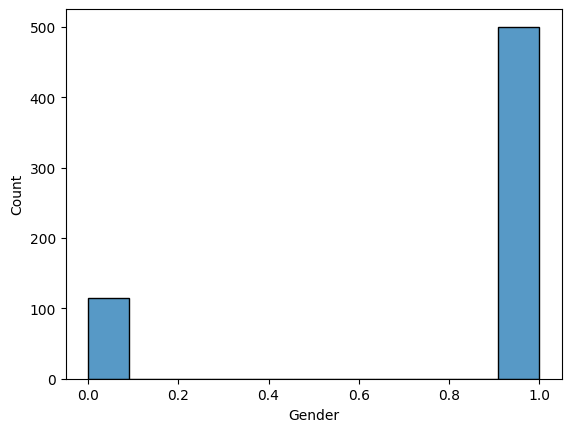

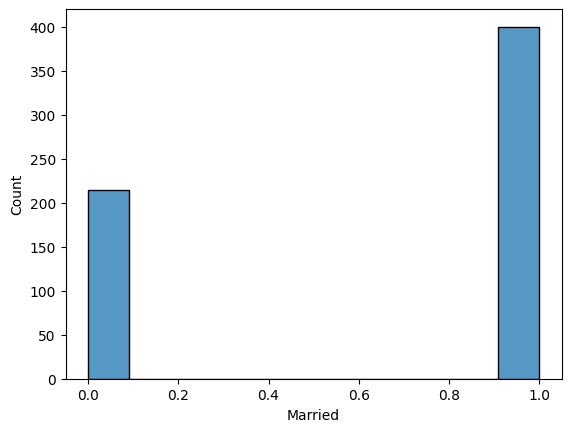

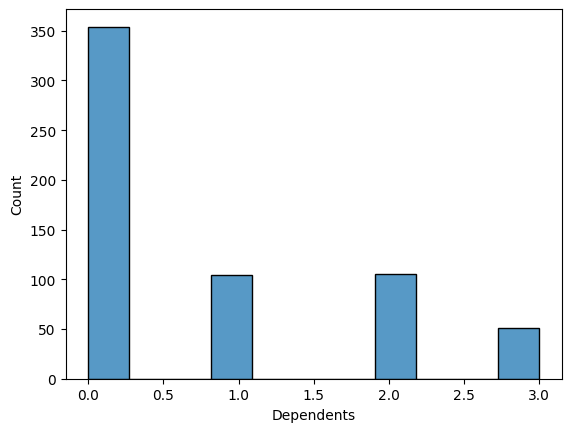

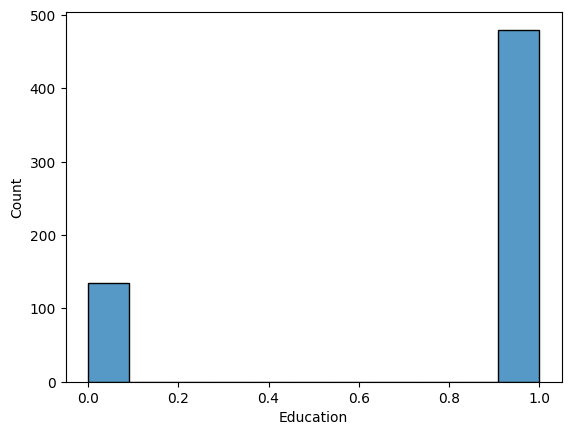

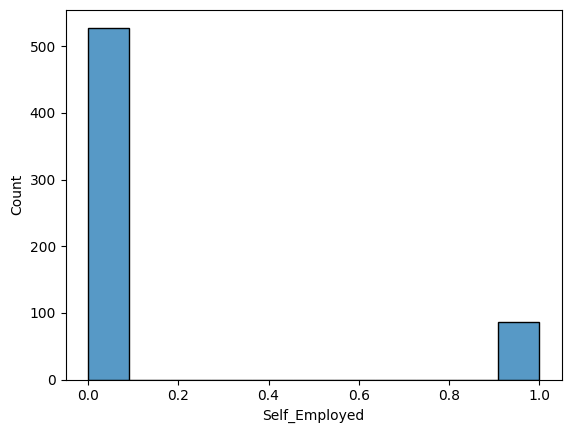

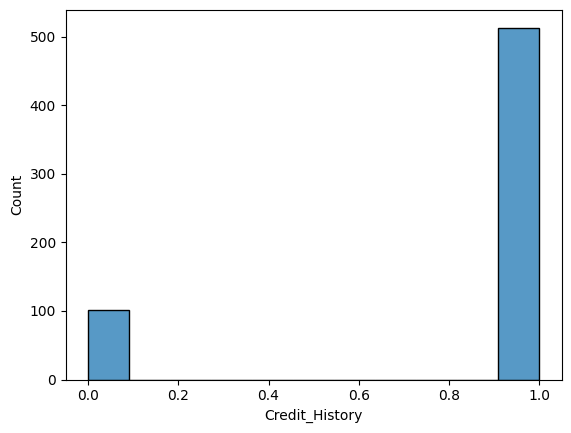

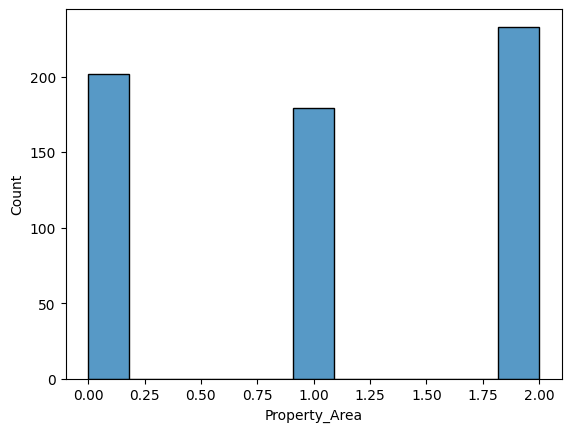

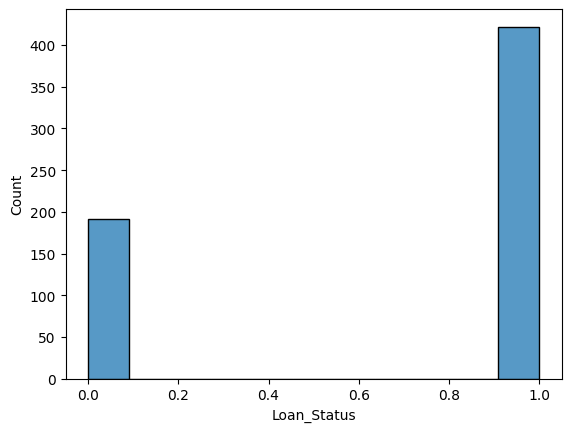

In [ ]:
for col in numeric_column:
    sns.histplot(df_train[col])
    plt.show()

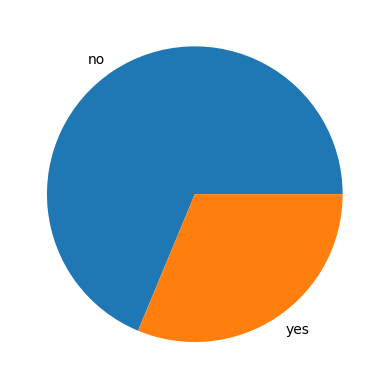

In [ ]:
x = df['Loan_Status'].value_counts()
plt.pie(x,labels=['no','yes']);

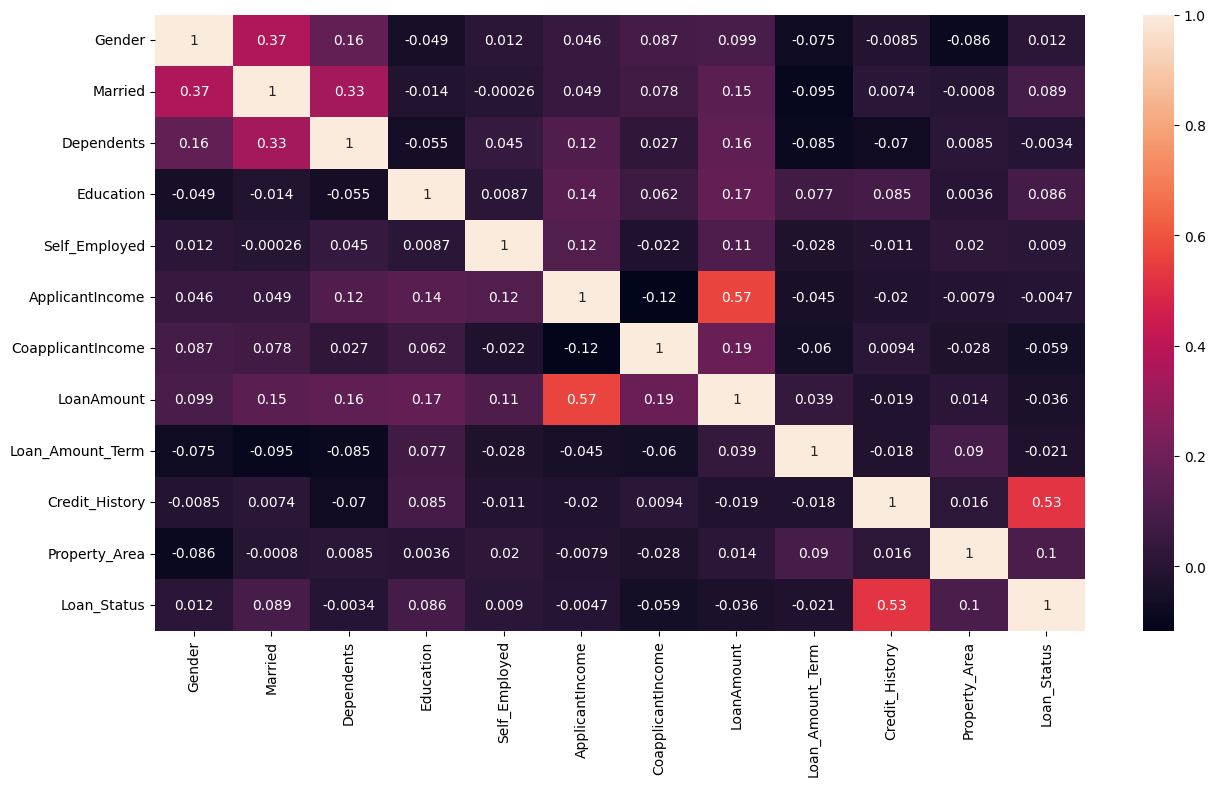

In [ ]:
plt.figure(figsize=[15,8])
sns.heatmap(df_train.corr(),annot=True);

In [ ]:
X = df_train.drop('Loan_ID', axis=1)

In [ ]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
X.fillna( method ='ffill', inplace = True)

In [ ]:
X = pd.get_dummies(X , drop_first = True)
X

,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1.0,1,0,0,0,0,0,0,0,1
1,1.0,1,1,1,0,0,0,0,0,0
2,1.0,1,1,0,0,0,0,1,0,1
3,1.0,1,1,0,0,0,1,0,0,1
4,1.0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
609,1.0,0,0,0,0,0,0,0,0,0
610,1.0,1,1,0,0,1,0,0,0,0
611,1.0,1,1,1,0,0,0,0,0,1
612,1.0,1,1,0,1,0,0,0,0,1


In [ ]:
X

,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1.0,1,0,0,0,0,0,0,0,1
1,1.0,1,1,1,0,0,0,0,0,0
2,1.0,1,1,0,0,0,0,1,0,1
3,1.0,1,1,0,0,0,1,0,0,1
4,1.0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
609,1.0,0,0,0,0,0,0,0,0,0
610,1.0,1,1,0,0,1,0,0,0,0
611,1.0,1,1,1,0,0,0,0,0,1
612,1.0,1,1,0,1,0,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X, y , test_size = 0.25 , random_state = 42, stratify=y)

In [ ]:
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
x_train_scaled

array([[ 0.4307749 ,  0.47265659,  0.73379939, ..., -0.40565621,
        -0.79084872, -0.69560834],
       [ 0.4307749 ,  0.47265659,  0.73379939, ..., -0.40565621,
        -0.79084872,  1.43759058],
       [ 0.4307749 ,  0.47265659,  0.73379939, ..., -0.40565621,
         1.26446434, -0.69560834],
       ...,
       [ 0.4307749 ,  0.47265659,  0.73379939, ...,  2.46514159,
         1.26446434, -0.69560834],
       [ 0.4307749 ,  0.47265659,  0.73379939, ..., -0.40565621,
        -0.79084872,  1.43759058],
       [ 0.4307749 ,  0.47265659,  0.73379939, ..., -0.40565621,
        -0.79084872,  1.43759058]])

In [ ]:




from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_scaled,y_train)
y_pred = lr.predict(x_test_scaled)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.56      0.70        48
           1       0.83      0.98      0.90       106

    accuracy                           0.85       154
   macro avg       0.88      0.77      0.80       154
weighted avg       0.86      0.85      0.84       154



In [ ]:
from sklearn.svm import SVC
classifier=SVC(kernel="rbf")
classifier.fit(x_train_scaled,y_train)

SVC()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(x_test_scaled)
accuracy_score(y_test, y_pred)

0.8506493506493507

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train_scaled,y_train)
y_pred = rf.predict(x_test_scaled)
print('evaluation on training', rf.score(x_train_scaled,y_train))
print('evaluation on testing', rf.score(x_test_scaled,y_test))

evaluation on training 0.8326086956521739
evaluation on testing 0.8051948051948052


In [ ]:
## KNN regressor
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train_scaled,y_train)
y_pred = knn.predict(x_test_scaled)
print('evaluation on training', knn.score(x_train_scaled,y_train))
print('evaluation on testing', knn.score(x_test_scaled,y_test))

evaluation on training 0.7978260869565217
evaluation on testing 0.8246753246753247


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a base classifier (you can choose other classifiers as well)
base_classifier = DecisionTreeClassifier(max_depth=1)

# Create an AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

# Train the AdaBoost classifier on the training data
adaboost_classifier.fit(x_train_scaled, y_train)

# Make predictions on the test data
predictions = adaboost_classifier.predict(x_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.85


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a base classifier (you can choose other classifiers as well)
base_classifier = DecisionTreeClassifier(max_depth=1)

# Create an AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

# Train the AdaBoost classifier on the training data
adaboost_classifier.fit(x_train_scaled, y_train)

# Make predictions on the test data
predictions = adaboost_classifier.predict(x_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.80


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.46      0.59        48
           1       0.80      0.95      0.87       106

    accuracy                           0.80       154
   macro avg       0.81      0.71      0.73       154
weighted avg       0.80      0.80      0.78       154



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Create a base classifier (you can choose other classifiers as well)
base_classifier = DecisionTreeClassifier(max_depth=1)

# Create an AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(base_classifier, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(adaboost_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_scaled, y_train)

# Get the best parameters and best model from the grid search
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test data using the best model
predictions = best_model.predict(x_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Best Parameters:", best_params)
print(f"Accuracy: {accuracy:.2f}")


Best Parameters: {'learning_rate': 0.01, 'n_estimators': 50}
Accuracy: 0.85


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.56      0.70        48
           1       0.83      0.98      0.90       106

    accuracy                           0.85       154
   macro avg       0.88      0.77      0.80       154
weighted avg       0.86      0.85      0.84       154



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Create a base classifier (you can choose other classifiers as well)
base_classifier = DecisionTreeClassifier(max_depth=1)

# Create an AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(base_classifier, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(adaboost_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best parameters and best model from the grid search
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test data using the best model
predictions = best_model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Best Parameters:", best_params)
print(f"Accuracy: {accuracy:.2f}")


Best Parameters: {'learning_rate': 0.01, 'n_estimators': 50}
Accuracy: 0.85


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Create a base classifier (Logistic Regression)
base_classifier = LogisticRegression()

# Create an AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(base_classifier, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(adaboost_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best parameters and best model from the grid search
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test data using the best model
predictions = best_model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Best Parameters:", best_params)
print(f"Accuracy: {accuracy:.2f}")


Best Parameters: {'learning_rate': 1.0, 'n_estimators': 100}
Accuracy: 0.85


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

# Build a simple neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train_scaled, y_train, epochs=50, batch_size=16, validation_split=0.1, verbose=2)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


Epoch 1/50
26/26 - 1s - loss: 1.0268 - accuracy: 0.6739 - val_loss: 0.8864 - val_accuracy: 0.7826 - 1s/epoch - 49ms/step
Epoch 2/50
26/26 - 0s - loss: 0.9422 - accuracy: 0.7126 - val_loss: 0.7992 - val_accuracy: 0.8043 - 101ms/epoch - 4ms/step
Epoch 3/50
26/26 - 0s - loss: 0.8665 - accuracy: 0.7319 - val_loss: 0.7276 - val_accuracy: 0.8478 - 100ms/epoch - 4ms/step
Epoch 4/50
26/26 - 0s - loss: 0.8150 - accuracy: 0.7512 - val_loss: 0.6766 - val_accuracy: 0.8696 - 98ms/epoch - 4ms/step
Epoch 5/50
26/26 - 0s - loss: 0.7662 - accuracy: 0.7633 - val_loss: 0.6313 - val_accuracy: 0.8696 - 118ms/epoch - 5ms/step
Epoch 6/50
26/26 - 0s - loss: 0.7357 - accuracy: 0.7802 - val_loss: 0.6000 - val_accuracy: 0.8696 - 103ms/epoch - 4ms/step
Epoch 7/50
26/26 - 0s - loss: 0.7216 - accuracy: 0.7802 - val_loss: 0.5723 - val_accuracy: 0.8696 - 88ms/epoch - 3ms/step
Epoch 8/50
26/26 - 0s - loss: 0.6790 - accuracy: 0.7778 - val_loss: 0.5546 - val_accuracy: 0.8696 - 100ms/epoch - 4ms/step
Epoch 9/50
26/26 - 0

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

# Generate or load your dataset and split it into train and test sets
# x_train, x_test, y_train, y_test = ...

# Create a base classifier
base_classifier = DecisionTreeClassifier(max_depth=1)

# Create an AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(base_classifier, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Perform Grid Search with cross-validation for AdaBoost
grid_search = GridSearchCV(adaboost_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_scaled, y_train)

# Get the best AdaBoost model from the grid search
best_adaboost_model = grid_search.best_estimator_

# Make predictions on the test data using the best AdaBoost model
adaboost_predictions = best_adaboost_model.predict(x_test_scaled)

# Build a simple neural network
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the neural network model
nn_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

# Train the neural network model
nn_model.fit(x_train_scaled, y_train, epochs=100, batch_size=8, validation_split=0.1, verbose=2) #epochs=50, batch_size=16,

# Make predictions on the test data using the neural network model
nn_predictions = nn_model.predict(x_test_scaled).flatten()

# Combine predictions using a simple majority vote
ensemble_predictions = np.round((adaboost_predictions + nn_predictions) / 2)

# Calculate ensemble accuracy
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print(f"Ensemble Accuracy: {ensemble_accuracy:.2f}")


Epoch 1/100
52/52 - 1s - loss: 1.0228 - accuracy: 0.6594 - val_loss: 0.8922 - val_accuracy: 0.7609 - 1s/epoch - 24ms/step
Epoch 2/100
52/52 - 0s - loss: 0.8884 - accuracy: 0.7246 - val_loss: 0.7611 - val_accuracy: 0.8696 - 162ms/epoch - 3ms/step
Epoch 3/100
52/52 - 0s - loss: 0.7914 - accuracy: 0.7536 - val_loss: 0.6707 - val_accuracy: 0.8696 - 144ms/epoch - 3ms/step
Epoch 4/100
52/52 - 0s - loss: 0.7342 - accuracy: 0.7681 - val_loss: 0.6146 - val_accuracy: 0.8696 - 146ms/epoch - 3ms/step
Epoch 5/100
52/52 - 0s - loss: 0.7018 - accuracy: 0.7705 - val_loss: 0.5757 - val_accuracy: 0.8696 - 184ms/epoch - 4ms/step
Epoch 6/100
52/52 - 0s - loss: 0.6491 - accuracy: 0.7802 - val_loss: 0.5603 - val_accuracy: 0.8696 - 233ms/epoch - 4ms/step
Epoch 7/100
52/52 - 0s - loss: 0.6328 - accuracy: 0.7754 - val_loss: 0.5324 - val_accuracy: 0.8696 - 197ms/epoch - 4ms/step
Epoch 8/100
52/52 - 0s - loss: 0.6196 - accuracy: 0.7802 - val_loss: 0.5180 - val_accuracy: 0.8696 - 196ms/epoch - 4ms/step
Epoch 9/10

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ensemble_predictions))

              precision    recall  f1-score   support

           0       0.93      0.56      0.70        48
           1       0.83      0.98      0.90       106

    accuracy                           0.85       154
   macro avg       0.88      0.77      0.80       154
weighted avg       0.86      0.85      0.84       154



In [ ]:
# after smote

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from imblearn.over_sampling import SMOTE
# Assuming you have already loaded and split your dataset into x_train, x_test, y_train, y_test

# Apply StandardScaler to the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled, y_train)


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

# Generate or load your dataset and split it into train and test sets
# x_train, x_test, y_train, y_test = ...

# Create a base classifier
base_classifier = DecisionTreeClassifier(max_depth=1)

# Create an AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(base_classifier, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Perform Grid Search with cross-validation for AdaBoost
grid_search = GridSearchCV(adaboost_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_resampled, y_train_resampled)

# Get the best AdaBoost model from the grid search
best_adaboost_model = grid_search.best_estimator_

# Make predictions on the test data using the best AdaBoost model
adaboost_predictions = best_adaboost_model.predict(x_test_scaled)

# Build a simple neural network
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the neural network model
nn_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

# Train the neural network model
nn_model.fit(x_train_resampled, y_train_resampled, epochs=100, batch_size=8, validation_split=0.1, verbose=2) #epochs=50, batch_size=16,

# Make predictions on the test data using the neural network model
nn_predictions = nn_model.predict(x_test_scaled).flatten()

# Combine predictions using a simple majority vote
ensemble_predictions = np.round((adaboost_predictions + nn_predictions) / 2)

# Calculate ensemble accuracy
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print(f"Ensemble Accuracy: {ensemble_accuracy:.2f}")


Epoch 1/100
71/71 - 2s - loss: 1.0056 - accuracy: 0.6232 - val_loss: 0.9597 - val_accuracy: 0.5000 - 2s/epoch - 25ms/step
Epoch 2/100
71/71 - 0s - loss: 0.8492 - accuracy: 0.7060 - val_loss: 0.8550 - val_accuracy: 0.5000 - 272ms/epoch - 4ms/step
Epoch 3/100
71/71 - 0s - loss: 0.7758 - accuracy: 0.7183 - val_loss: 0.7689 - val_accuracy: 0.5156 - 279ms/epoch - 4ms/step
Epoch 4/100
71/71 - 0s - loss: 0.7304 - accuracy: 0.7148 - val_loss: 0.7386 - val_accuracy: 0.5156 - 278ms/epoch - 4ms/step
Epoch 5/100
71/71 - 0s - loss: 0.6834 - accuracy: 0.7342 - val_loss: 0.7339 - val_accuracy: 0.5156 - 266ms/epoch - 4ms/step
Epoch 6/100
71/71 - 0s - loss: 0.6631 - accuracy: 0.7289 - val_loss: 0.6770 - val_accuracy: 0.5156 - 249ms/epoch - 4ms/step
Epoch 7/100
71/71 - 0s - loss: 0.6414 - accuracy: 0.7236 - val_loss: 0.6108 - val_accuracy: 0.5469 - 277ms/epoch - 4ms/step
Epoch 8/100
71/71 - 0s - loss: 0.6201 - accuracy: 0.7394 - val_loss: 0.6798 - val_accuracy: 0.5156 - 276ms/epoch - 4ms/step
Epoch 9/10

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, ensemble_predictions)
roc_auc = auc(fpr, tpr)

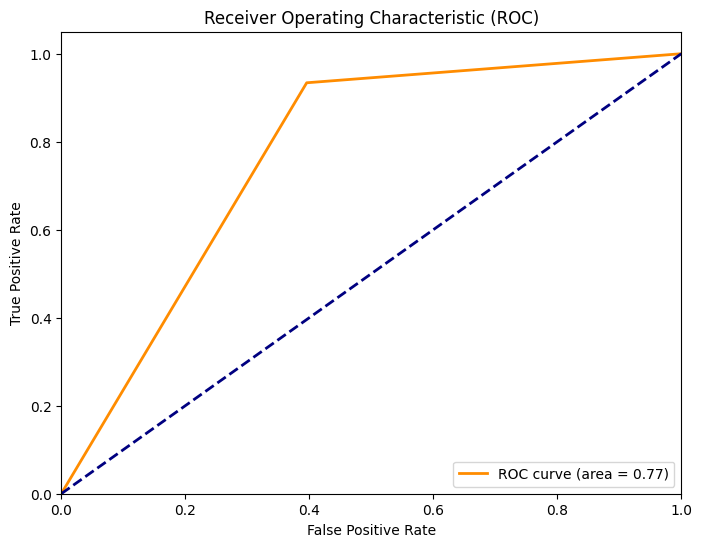

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ensemble_predictions))

              precision    recall  f1-score   support

           0       0.81      0.60      0.69        48
           1       0.84      0.93      0.88       106

    accuracy                           0.83       154
   macro avg       0.82      0.77      0.79       154
weighted avg       0.83      0.83      0.82       154



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a base classifier (you can choose other classifiers as well)
base_classifier = DecisionTreeClassifier(max_depth=1)

# Create an AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

# Train the AdaBoost classifier on the training data
adaboost_classifier.fit(x_train_resampled, y_train_resampled)

# Make predictions on the test data
predictions = adaboost_classifier.predict(x_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.82


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

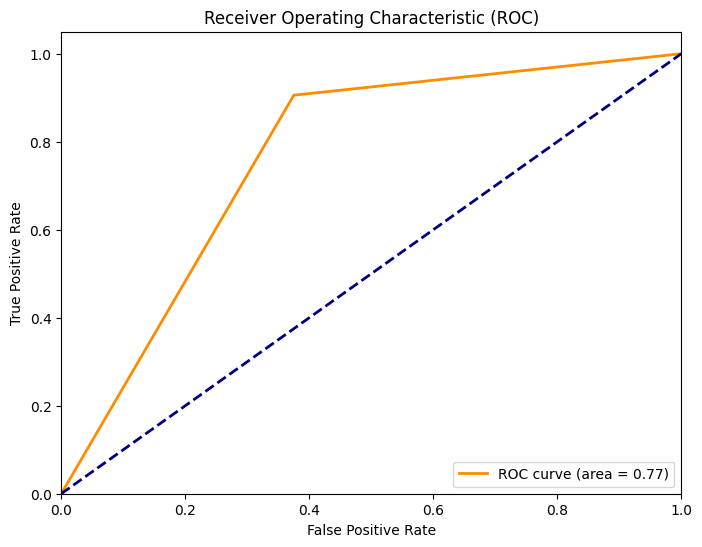

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.75      0.62      0.68        48
           1       0.84      0.91      0.87       106

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.81      0.82      0.81       154



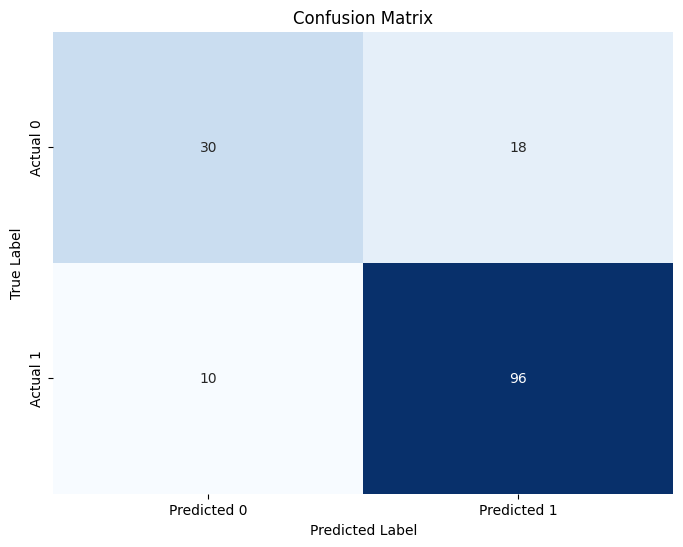

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test,predictions)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("/content/train_u6lujuX_CVtuZ9i.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.isna().sum()#sum of not null values in file

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df.dropna(how='all',subset=["Gender","Married","Dependents","Self_Employed","LoanAmount","Loan_Amount_Term","Credit_History"])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df.dropna(how="all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
df["Dependents"].replace("3+",3,inplace=True)

In [ ]:
pmod=df["Dependents"].mode()
pmod

0    0
Name: Dependents, dtype: object

In [ ]:
df["Dependents"].fillna('0',inplace=True) #fillna(0) replacing the nan values in 0

In [ ]:
df["Dependents"].isna().sum()

0

In [ ]:
df.Dependents.value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [ ]:
df["Dependents"]=df["Dependents"].astype("int64")

In [ ]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
gm=df["Gender"].mode()
mm=df["Married"].mode()
ms=df["Self_Employed"].mode()

print(gm)
print(mm)
print(ms)

0    Male
Name: Gender, dtype: object
0    Yes
Name: Married, dtype: object
0    No
Name: Self_Employed, dtype: object


In [ ]:
df["Gender"].fillna("Male", inplace=True)
df["Married"].fillna("Yes", inplace=True)
df["Self_Employed"].fillna("No", inplace=True)

In [ ]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
lmean=df["LoanAmount"].mean()
amean=df["Loan_Amount_Term"].mean()
cmean=df["Credit_History"].mean()

print(lmean)
print(amean)
print(cmean)

146.41216216216216
342.0
0.8421985815602837


In [ ]:
df["LoanAmount"].fillna(lmean, inplace=True)
df["Loan_Amount_Term"].fillna(amean, inplace=True)
df["Credit_History"].fillna(cmean, inplace=True)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [ ]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

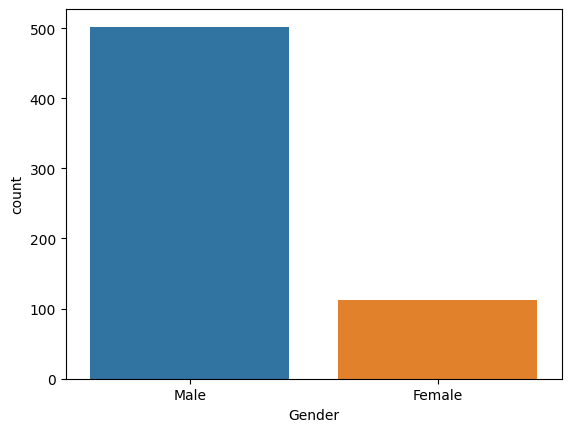

In [ ]:
sns.countplot(x="Gender",data=df)
plt.show()

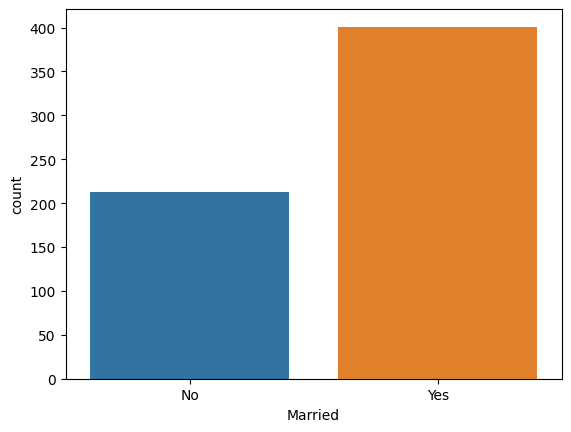

In [ ]:
sns.countplot(x="Married",data=df)
plt.show()

In [ ]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

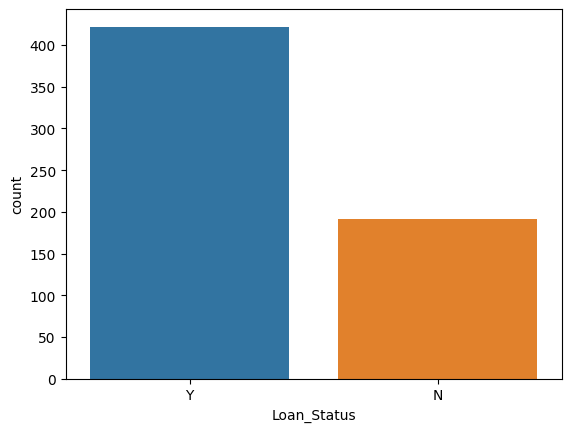

In [ ]:
sns.countplot(x="Loan_Status",data=df)
plt.show()

<Axes: title={'center': 'Loan_Amount_Term'}, ylabel='Loan_Amount_Term'>

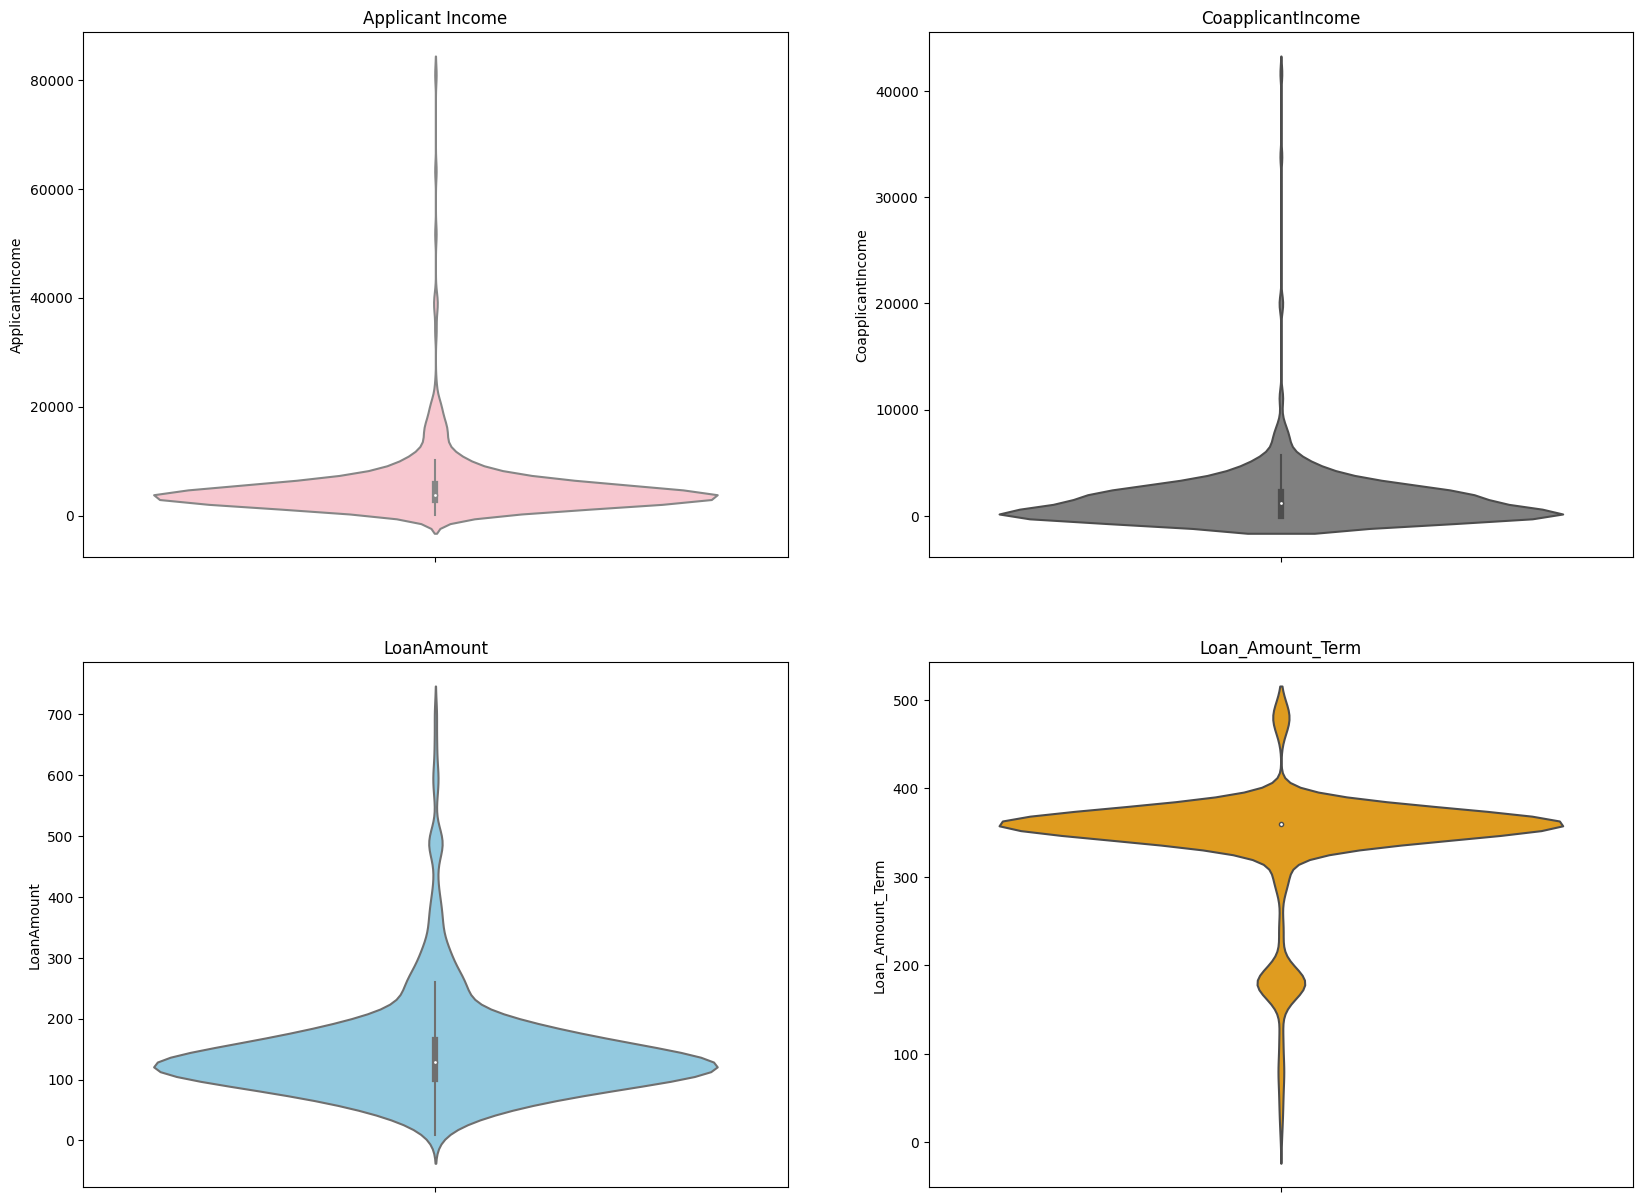

In [ ]:
#Violin Plot

fig, axis1 = plt.subplots(2, 2, figsize=(20,15))
axis1[0,0].set_title("Applicant Income")
sns.violinplot(data=df,y="ApplicantIncome",ax=axis1[0,0],color="pink")
axis1[0,1].set_title("CoapplicantIncome")
sns.violinplot(data=df,y="CoapplicantIncome",ax=axis1[0,1],color="grey")
axis1[1,0].set_title("LoanAmount")
sns.violinplot(data=df,y="LoanAmount",ax=axis1[1,0],color="skyblue")
axis1[1,1].set_title("Loan_Amount_Term")
sns.violinplot(data=df,y="Loan_Amount_Term",ax=axis1[1,1],color="orange")

<Axes: >

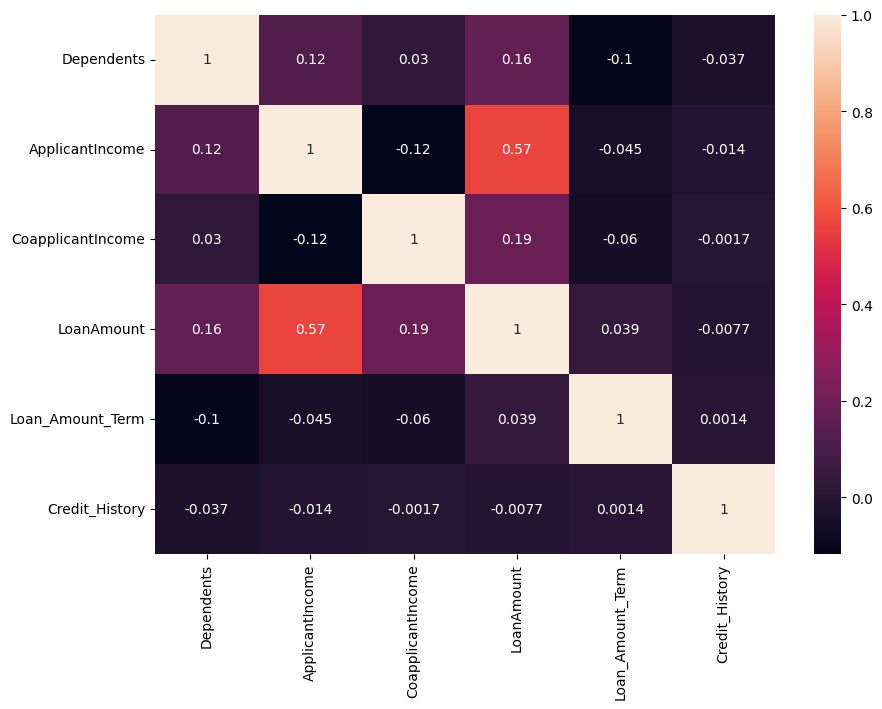

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)

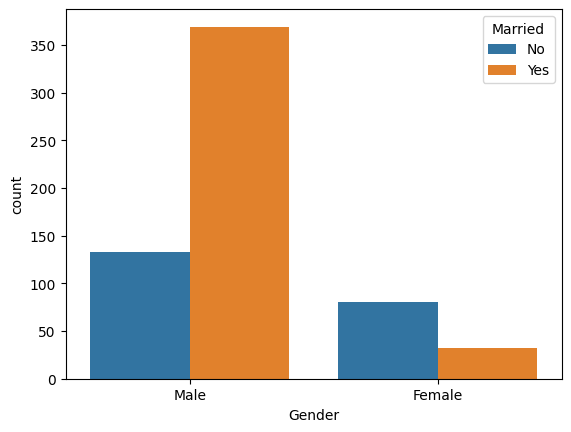

In [ ]:
sns.countplot(x="Gender",hue="Married",data=df)
plt.show()

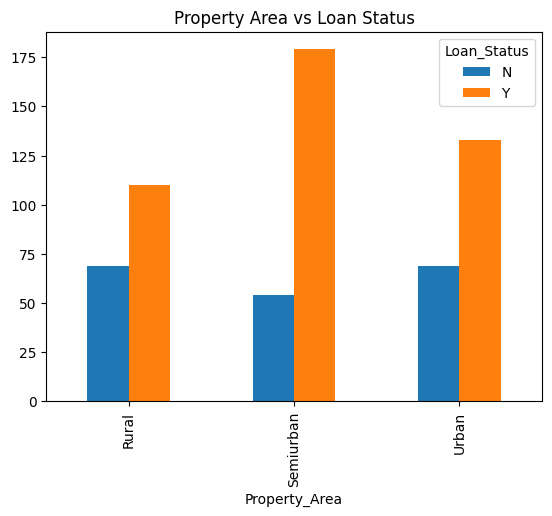

In [ ]:
pd.crosstab(df.Property_Area,df.Loan_Status).plot(kind="bar")
plt.title("Property Area vs Loan Status")
plt.show()

In [ ]:
ocols=df.select_dtypes(["object"]).columns
ocols=ocols[0:]
ocols

Index(['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df[ocols]=oe.fit_transform(df[ocols])

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,1,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,2.0,1.0,1.0,0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,3.0,1.0,1.0,0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,4.0,1.0,0.0,0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0


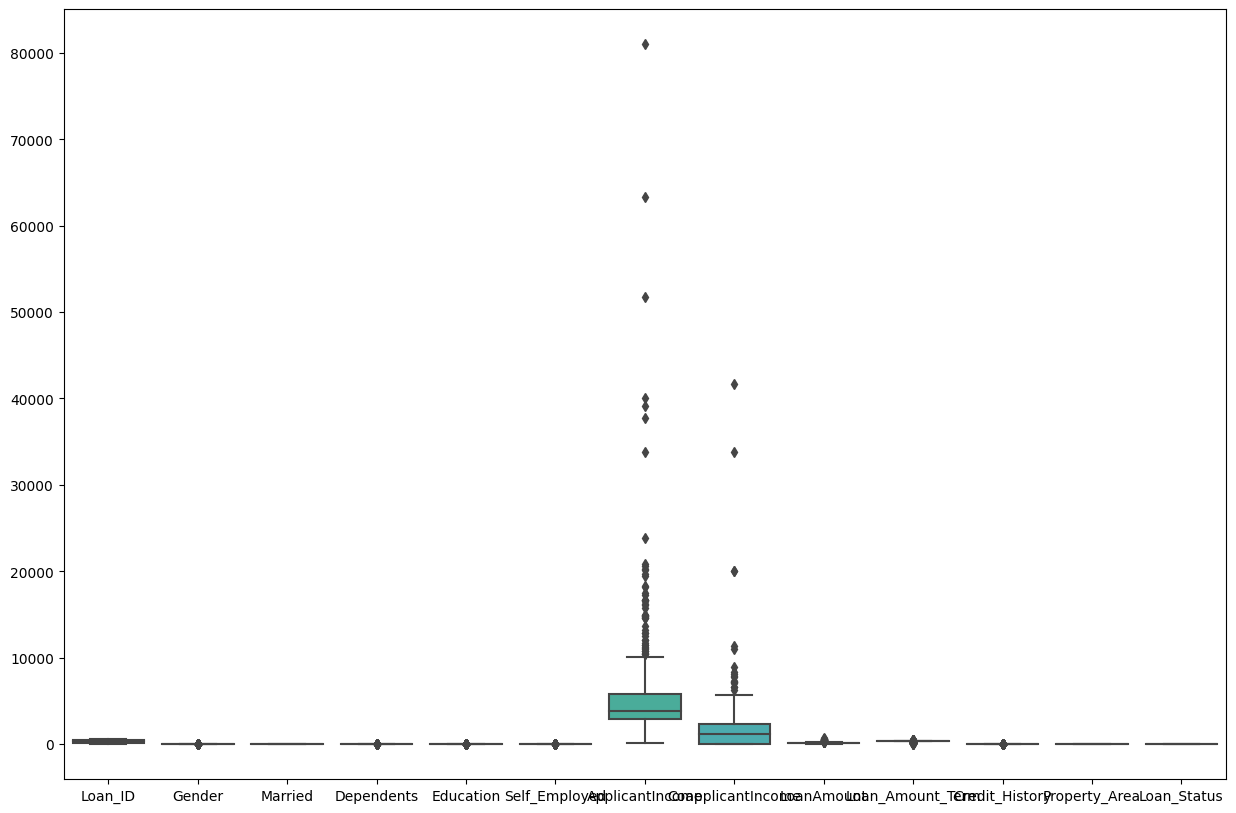

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df)
plt.show()

In [ ]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

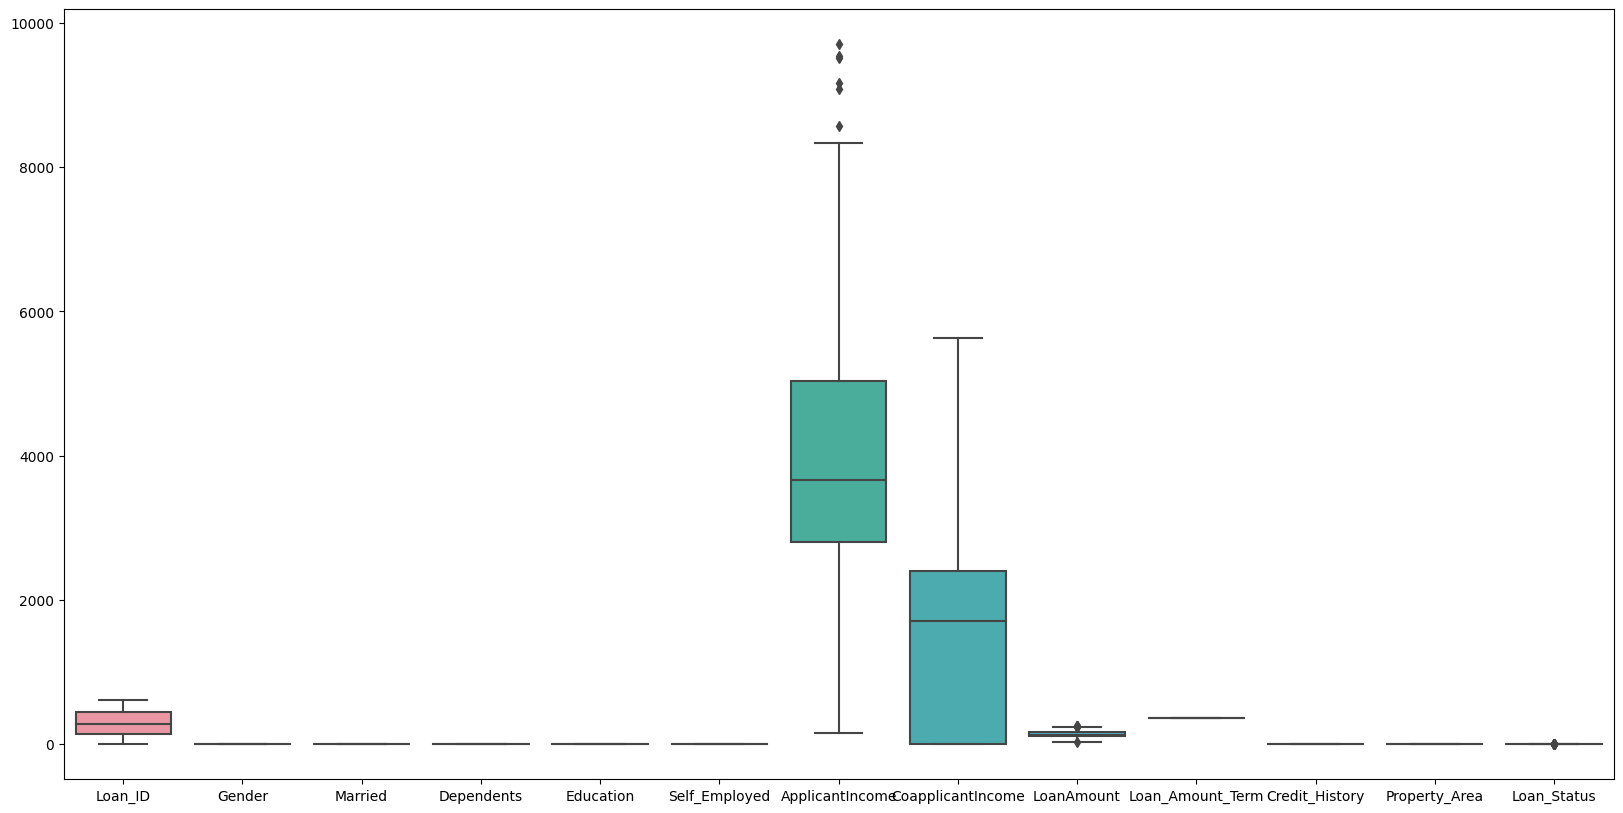

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df)
plt.show()

In [ ]:
df.ApplicantIncome=np.sqrt(df.ApplicantIncome)
df.Laon_Status=np.sqrt(df.Loan_Status)
#df.CoapplicantIncome=np.sqrt(df.CoapplicantIncome)
#df.LoanAmount=np.sqrt(df.LoanAmount)

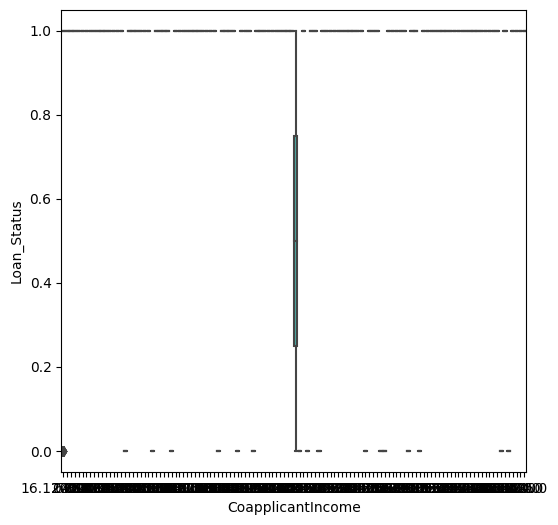

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(x="CoapplicantIncome",y="Loan_Status",data=df)
plt.show()

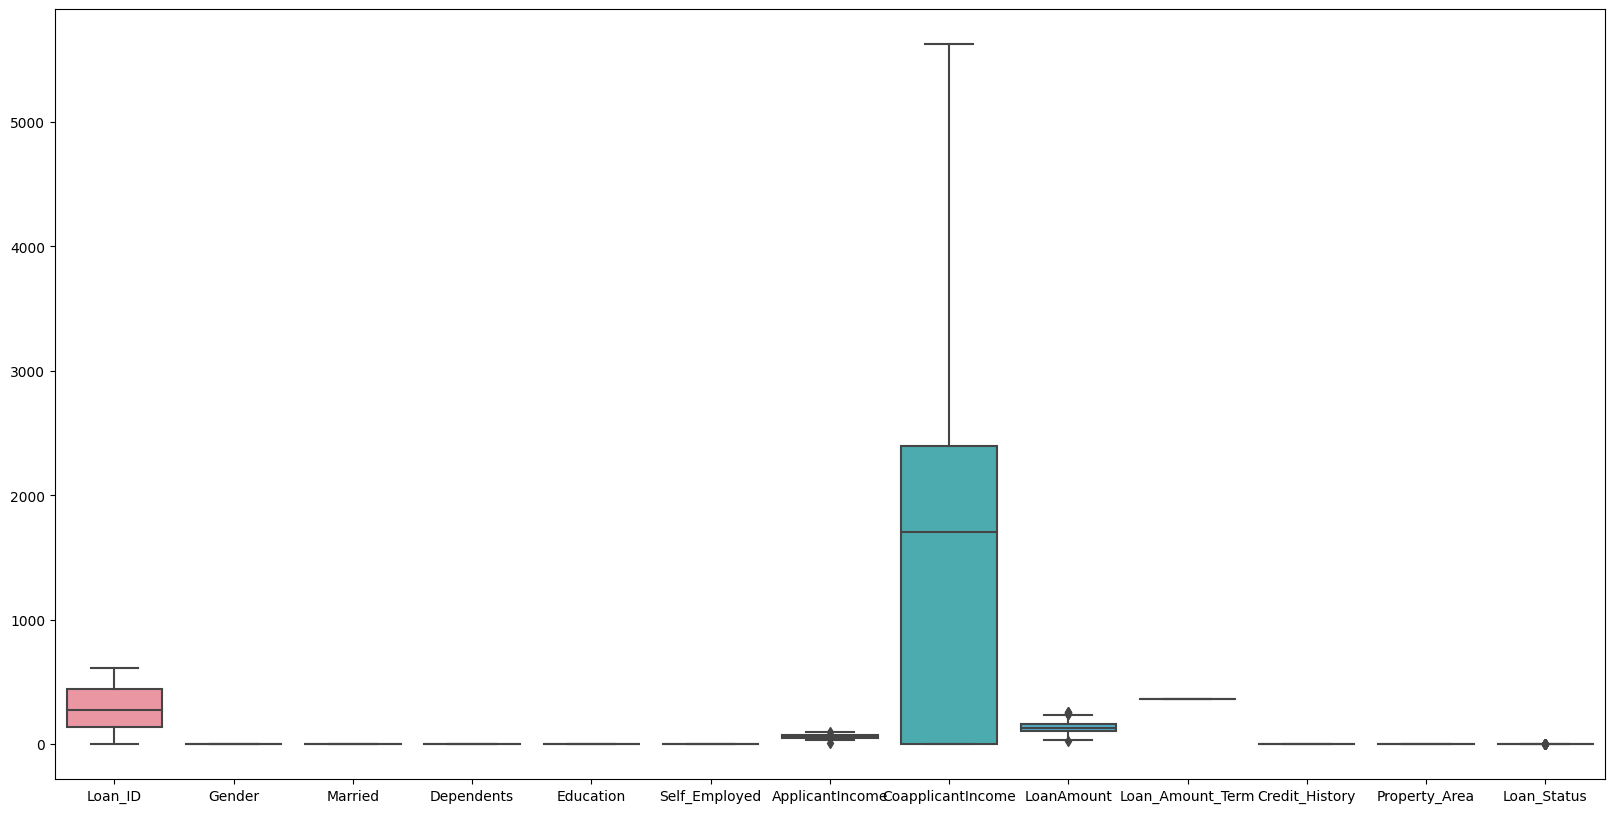

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df)
plt.show()

<Axes: title={'center': 'Loan_Status'}, xlabel='Loan_Status', ylabel='Count'>

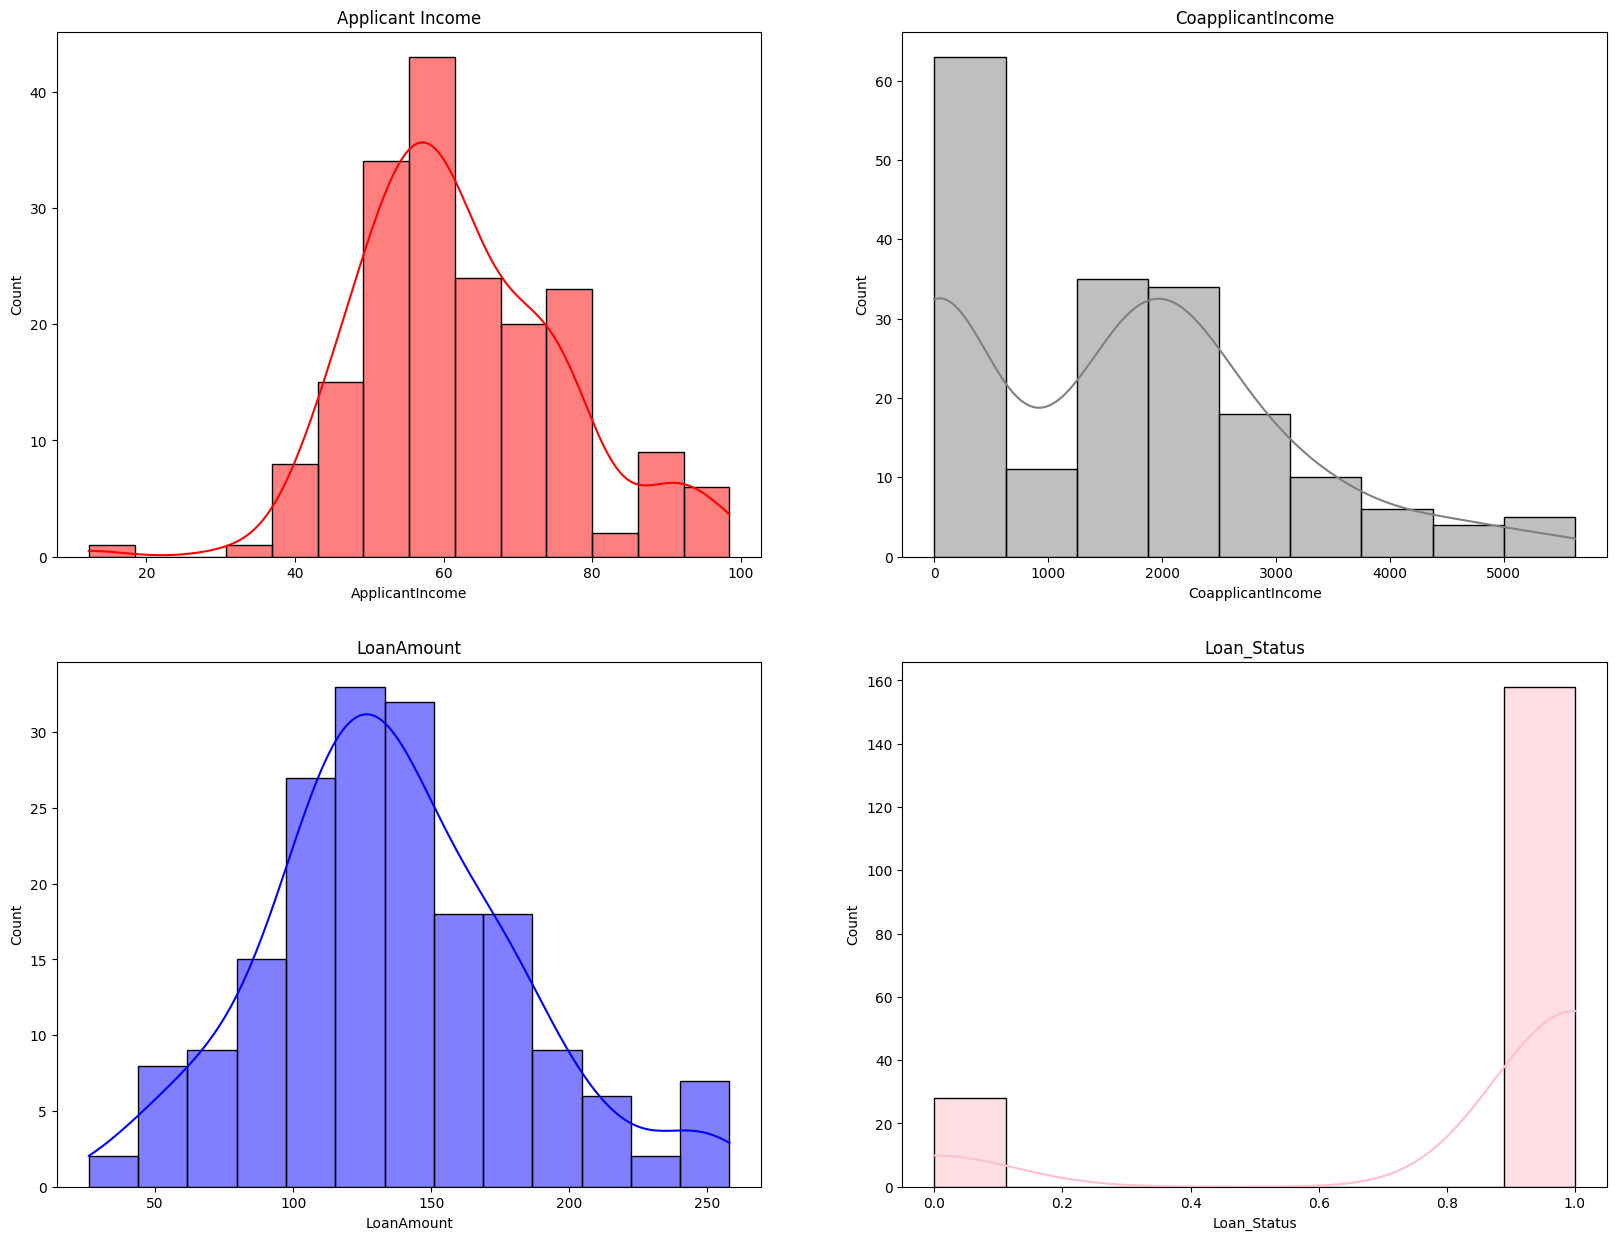

In [ ]:
fig, axis1 = plt.subplots(2, 2, figsize=(20,15))
axis1[0,0].set_title("Applicant Income")
sns.histplot(data=df,x="ApplicantIncome",kde=True,ax=axis1[0,0],color="red")
axis1[0,1].set_title("CoapplicantIncome")
sns.histplot(data=df,x="CoapplicantIncome",kde=True,ax=axis1[0,1],color="grey")
axis1[1,0].set_title("LoanAmount")
sns.histplot(data=df,x="LoanAmount",kde=True,ax=axis1[1,0],color="blue")
axis1[1,1].set_title("Loan_Status")
sns.histplot(data=df,x="Loan_Status",kde=True,ax=axis1[1,1],color="pink")

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
y.head()

0     1.0
1     0.0
4     1.0
8     1.0
10    1.0
Name: Loan_Status, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
def mymodel(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)

    tr=model.score(x_train,y_train)
    te=model.score(x_test,y_test)
    print(f"Training Accuracy: {tr}\n\nTesting Accuracy: {te}\n")
    Acc=accuracy_score(y_pred,y_test)

    print("Accuracy: {:2f}%".format(Acc*100))


    print("\nClassification Report :\n ",classification_report(y_test,y_pred))

    return model

In [ ]:
df["Loan_Status"]=df["Loan_Status"].astype("int64")
df["LoanAmount"]=df["LoanAmount"].astype("int64")
df["CoapplicantIncome"]=df["CoapplicantIncome"].astype("int64")
df["ApplicantIncome"]=df["ApplicantIncome"].astype("int64")

In [ ]:
X=df.drop(["Loan_Status"],axis=1)
y=df["Loan_Status"]
y.value_counts().to_frame().T

,1,0
Loan_Status,158,28


In [ ]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

X_resampled, y_resampled=SMOTE().fit_resample(X,y)
X, y=SMOTE().fit_resample(X,y)

In [ ]:
y.value_counts().to_frame().T

,1,0
Loan_Status,158,158


In [ ]:
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()

X=mn.fit_transform(X)

In [ ]:
for i in y_test:
  print(i)

1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

knn=mymodel(KNeighborsClassifier())

Training Accuracy: 0.841726618705036

Testing Accuracy: 0.9148936170212766

Accuracy: 91.489362%

Classification Report :
                precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       0.91      1.00      0.96        43

    accuracy                           0.91        47
   macro avg       0.46      0.50      0.48        47
weighted avg       0.84      0.91      0.87        47



In [ ]:
svm=mymodel(SVC())

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Create a base classifier (you can choose other classifiers as well)
base_classifier = DecisionTreeClassifier(max_depth=1)

# Create an AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(base_classifier, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(adaboost_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best parameters and best model from the grid search
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test data using the best model
predictions = best_model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Best Parameters:", best_params)
print(f"Accuracy: {accuracy:.2f}")


In [ ]:
## KNN regressor
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print('evaluation on training', knn.score(x_train,y_train))
print('evaluation on testing', knn.score(x_test,y_test))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier